<a href="https://colab.research.google.com/github/riyachandaria/BSc-Data-Science-Project/blob/main/Code/Code_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
!pip install -q geopandas
import geopandas as gpd
from IPython.display import display
import numpy as np
import textwrap
from tabulate import tabulate
from pandas.plotting import table
# import tensorflow as tf

In [ ]:
# Accessing data file
file_path = 'https://raw.githubusercontent.com/riyachandaria/BSc-Data-Science-Project/refs/heads/main/Data%20Files/owid-co2-data.csv'  # dataset dowloaded on 14th Nov 2024
df = pd.read_csv(file_path)

In [ ]:
df.head(10)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.157,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.156,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.156,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.155,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
5,Afghanistan,1855,AFG,3835192.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.155,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
6,Afghanistan,1856,AFG,3852417.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.154,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
7,Afghanistan,1857,AFG,3869714.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.154,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
8,Afghanistan,1858,AFG,3887081.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.154,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
9,Afghanistan,1859,AFG,3904521.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.154,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47415 entries, 0 to 47414
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    47415 non-null  object 
 1   year                                       47415 non-null  int64  
 2   iso_code                                   39548 non-null  object 
 3   population                                 39414 non-null  float64
 4   gdp                                        15211 non-null  float64
 5   cement_co2                                 23764 non-null  float64
 6   cement_co2_per_capita                      22017 non-null  float64
 7   co2                                        30308 non-null  float64
 8   co2_growth_abs                             28157 non-null  float64
 9   co2_growth_prct                            24684 non-null  float64
 10  co2_including_luc     

# Data Cleaning/Preprocessing

In [ ]:
# Function to selected desired columns and remove any NaNs
def cleaning_data(df):

  # Keep only the columns specified by index
  small_df = df.iloc[:, list(range(0,10)) + [16, 17, 19, 20] + list(range(33,39)) + list(range(40,51)) + [75, 77]]

  # Removing any NaNs
  cleaned_df = small_df.dropna()

  # Ensure the year column is numeric (in case it's not already)
  cleaned_df.loc[:, 'year'] = pd.to_numeric(cleaned_df['year'], errors='coerce')

  # Return the cleaned dataframe
  return cleaned_df

cleaned_df = cleaning_data(df)

# Exploratory Data Analysis

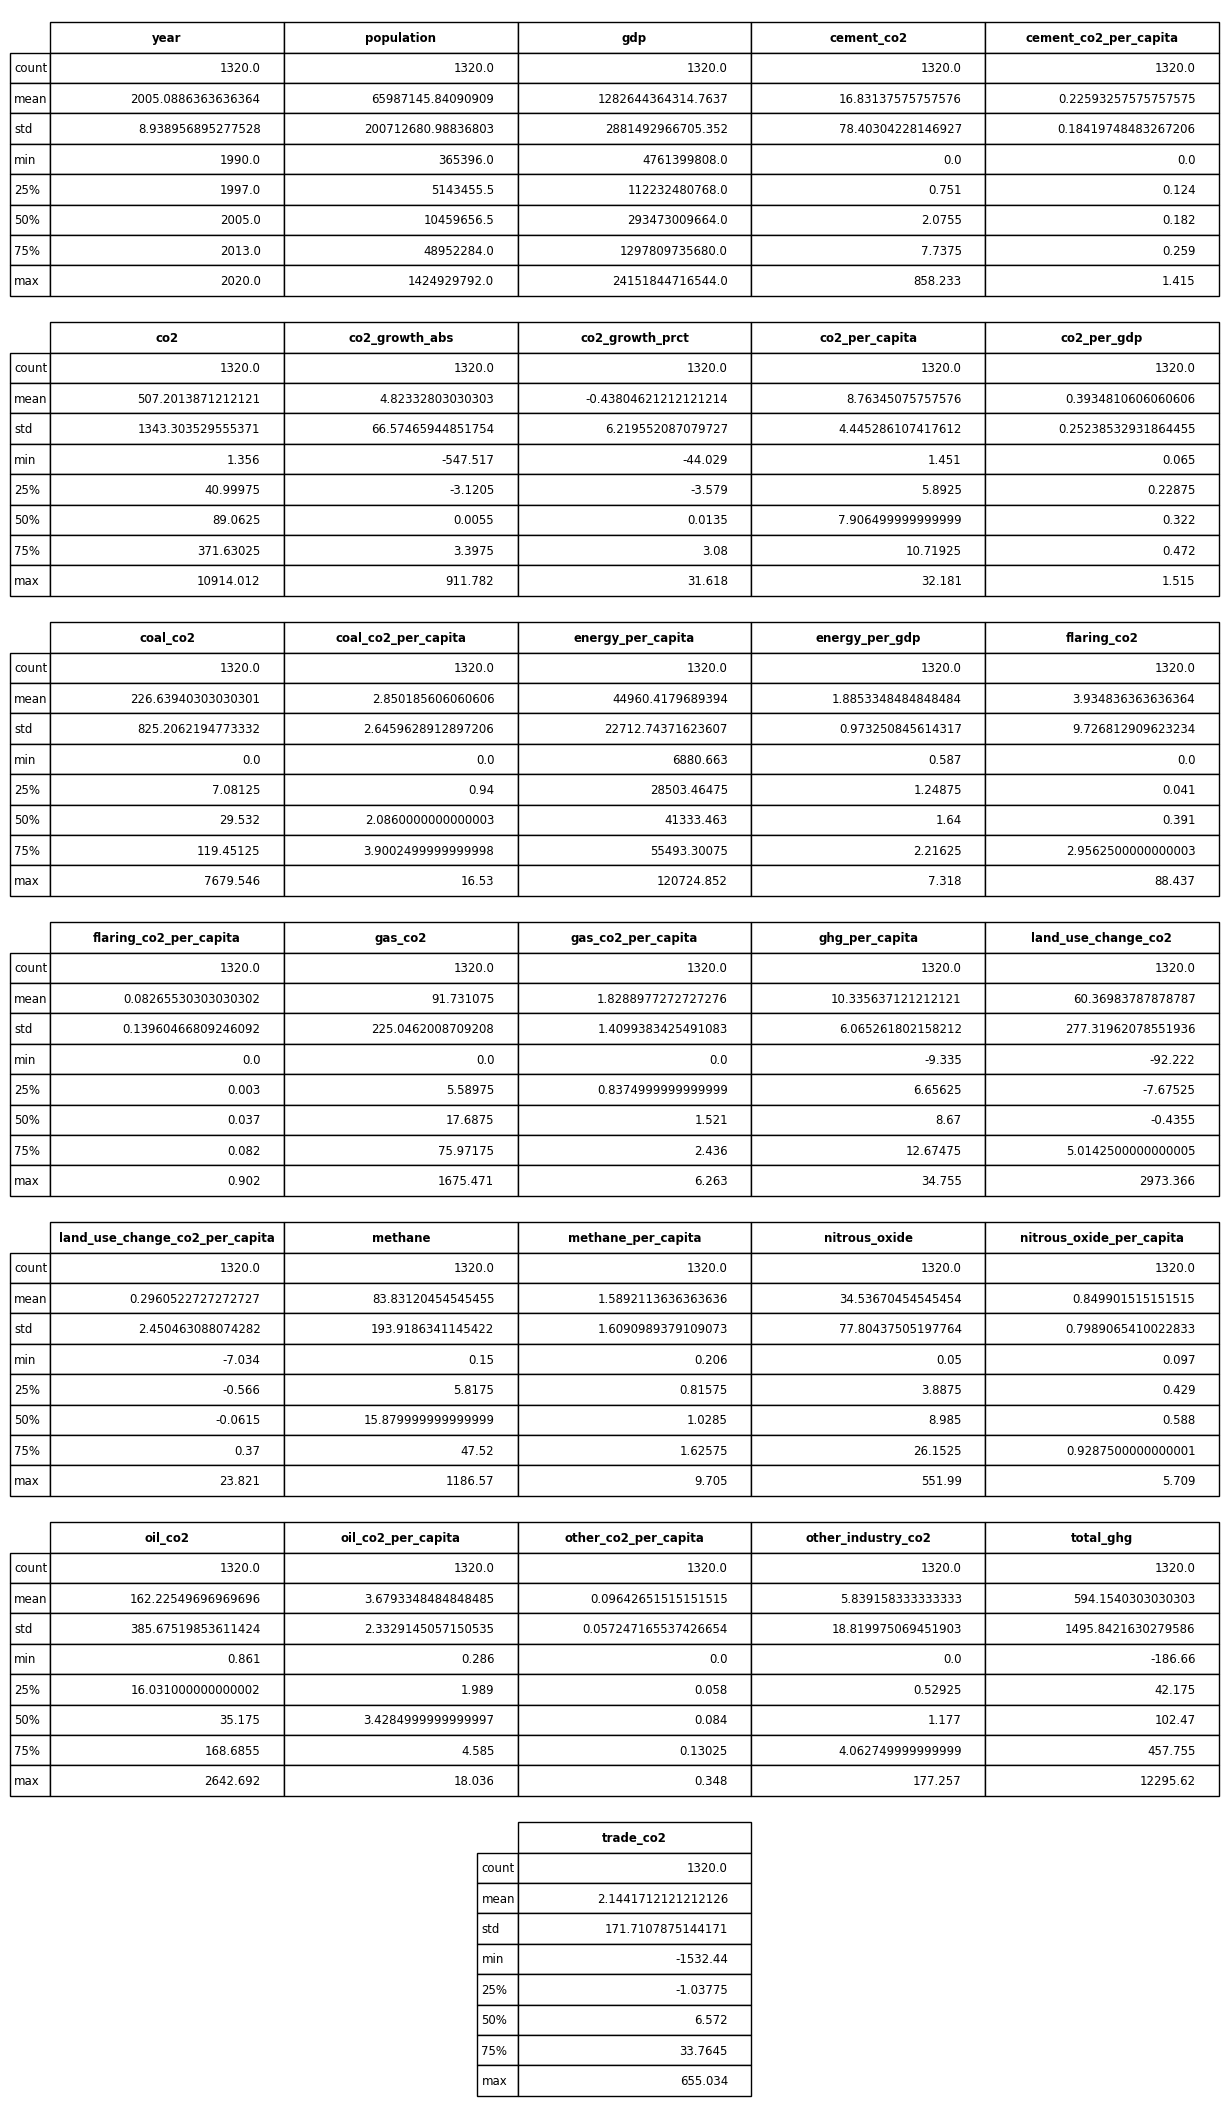

<class 'pandas.core.frame.DataFrame'>
Index: 1320 entries, 3409 to 45133
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         1320 non-null   object 
 1   year                            1320 non-null   int64  
 2   iso_code                        1320 non-null   object 
 3   population                      1320 non-null   float64
 4   gdp                             1320 non-null   float64
 5   cement_co2                      1320 non-null   float64
 6   cement_co2_per_capita           1320 non-null   float64
 7   co2                             1320 non-null   float64
 8   co2_growth_abs                  1320 non-null   float64
 9   co2_growth_prct                 1320 non-null   float64
 10  co2_per_capita                  1320 non-null   float64
 11  co2_per_gdp                     1320 non-null   float64
 12  coal_co2                        132

In [ ]:
# 1. Overview of data

# print(cleaned_df.describe())
description = cleaned_df.describe()
# Split the table into chunks based on columns
max_columns_per_table = 5 # Adjust the number of columns per table
num_tables = (description.shape[1] // max_columns_per_table) + 1
# Create a figure for displaying multiple parts
fig, axs = plt.subplots(num_tables, 1, figsize=(12, num_tables * 3))
# Loop through the tables and plot them one by one
for i in range(num_tables):
    start_col = i * max_columns_per_table
    end_col = (i + 1) * max_columns_per_table
    chunk = description.iloc[:, start_col:end_col]
    ax = axs[i]
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    # Remove the spines (lines) around the plot
    for spine in ax.spines.values():
        spine.set_visible(False)
    # Create the table for each chunk
    tab = table(ax, chunk, loc='center', colWidths=[0.2] * len(chunk.columns))
    # Adjust the font size to fit the table
    tab.auto_set_font_size(False)
    tab.set_fontsize(8.5)
    tab.scale(1.2, 1.2)
    # Wrap only the header text and make it bold
    for (i, j) in tab.get_celld():
        cell = tab.get_celld()[(i, j)]
        if i == 0: # Header row
            # Access the Text object of the header cell
            text = cell.get_text()
            # Make the header bold
            text.set_fontweight('bold')
            # Manually insert line breaks into the header label to wrap text
            new_text = text.get_text().replace(' ', '\n')
            text.set_text(new_text)
plt.tight_layout(pad=0.0)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

print(cleaned_df.info())

In [ ]:
## Top 10 countries with the highest GDP between 2015-2020

# Filter data for the years 2015-2020
data_2015_2020 = cleaned_df[(cleaned_df['year'] >= 2015) & (cleaned_df['year'] <= 2020)]

# Calculate the average GDP for each country between 2015 and 2020
avg_gdp = data_2015_2020.groupby('country', as_index=False).agg({'gdp': 'mean'})

# Get the top 10 countries with the highest average GDP
top_gdp_countries = avg_gdp.nlargest(10, 'gdp')['country']

# Reset index to start from 1
top_gdp_countries = top_gdp_countries.reset_index(drop=True)
top_gdp_countries.index = top_gdp_countries.index + 1

# Print top 10
display(top_gdp_countries)

,country
1,China
2,United States
3,Japan
4,Germany
5,Russia
6,Brazil
7,France
8,United Kingdom
9,Italy
10,South Korea


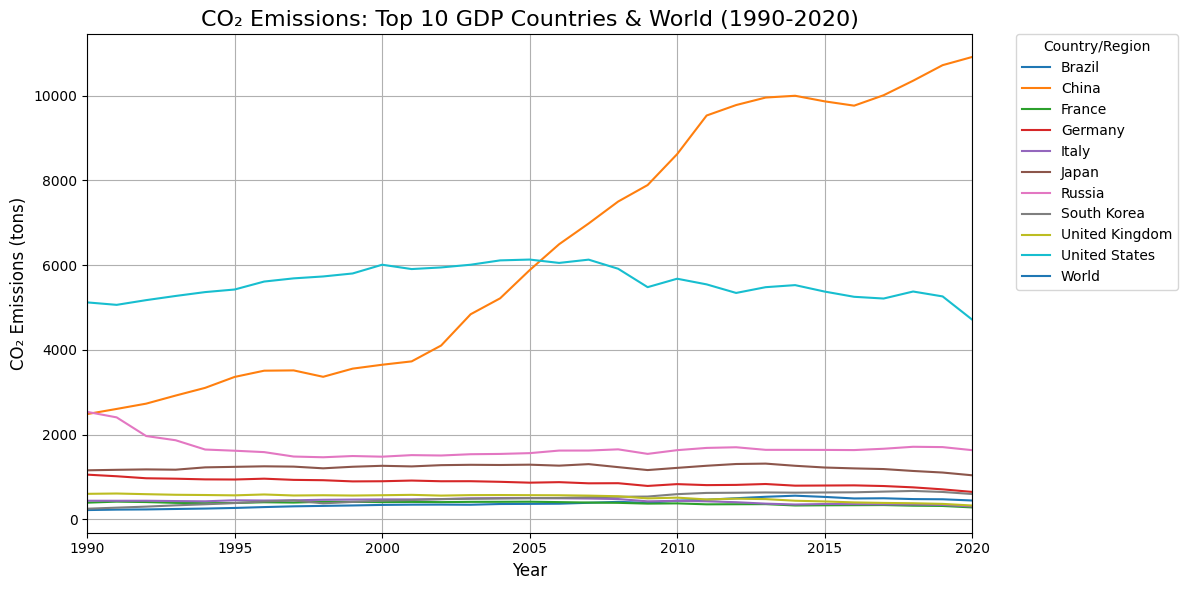

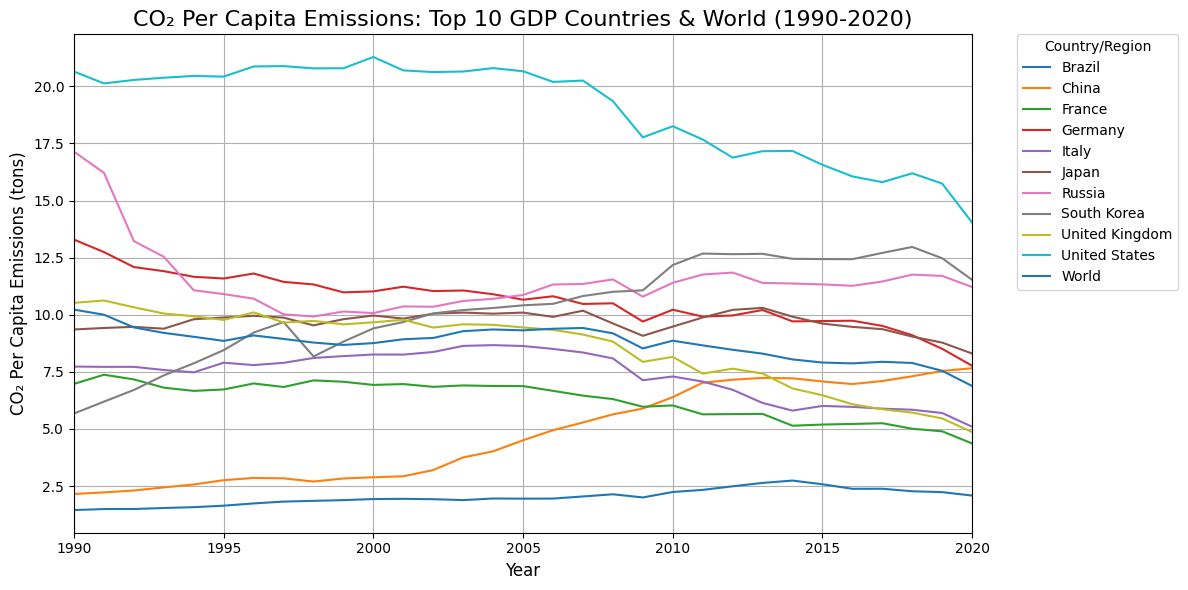

In [ ]:
# 2. CO2 emission per capita for the top 10 countries with the highest GDP between 2015-2020

# Filter data for the years 2015-2020
data_2015_2020 = cleaned_df[(cleaned_df['year'] >= 2015) & (cleaned_df['year'] <= 2020)]

# Calculate the average GDP for each country between 2015 and 2020
avg_gdp = data_2015_2020.groupby('iso_code', as_index=False).agg({'gdp': 'mean'})

# Get the top 10 countries with the highest average GDP
top_gdp_countries = avg_gdp.nlargest(10, 'gdp')['iso_code'].tolist()

# Create a copy of the filtered data to avoid SettingWithCopyWarning
big_countries_data = cleaned_df[cleaned_df['iso_code'].isin(top_gdp_countries)].copy()

# Calculate the global average per capita CO2 emissions
global_avg = cleaned_df.groupby('year', as_index=False).agg({'co2_per_capita': 'mean'})
global_avg['iso_code'] = 'World'  # Add a label for the global average

# Combine big countries data with global average
combined_data = pd.concat([big_countries_data, global_avg], ignore_index=True)

# Mapping ISO codes to full country names (Update this as necessary if iso_code to country mapping is available)
data_latest_year = cleaned_df[cleaned_df['year'] == cleaned_df['year'].max()]
country_name_mapping = {row['iso_code']: row['country'] for _, row in data_latest_year.iterrows()}
country_name_mapping['World'] = 'World'  # Include "World" for global average

# Replace ISO codes with country names
combined_data['country_name'] = combined_data['iso_code'].map(country_name_mapping)

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_data, x='year', y='co2', hue='country_name', palette='tab10')
plt.title("CO₂ Emissions: Top 10 GDP Countries & World (1990-2020)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("CO₂ Emissions (tons)", fontsize=12)
plt.xlim(1990, 2020)
plt.legend(title="Country/Region", loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_data, x='year', y='co2_per_capita', hue='country_name', palette='tab10')
plt.title("CO₂ Per Capita Emissions: Top 10 GDP Countries & World (1990-2020)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("CO₂ Per Capita Emissions (tons)", fontsize=12)
plt.xlim(1990, 2020)
plt.legend(title="Country/Region", loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
## Bottom 10 countries with the highest GDP between 2015-2020

# Filter data for the years 2015-2020
data_2015_2020 = cleaned_df[(cleaned_df['year'] >= 2015) & (cleaned_df['year'] <= 2020)]

# Calculate the average GDP for each country between 2015 and 2020
avg_gdp = data_2015_2020.groupby('country', as_index=False).agg({'gdp': 'mean'})

# Get the bottom 10 countries with the lowest average GDP
bottom_gdp_countries = avg_gdp.nsmallest(10, 'gdp')['country']

# Reset index to start from 1
bottom_gdp_countries = bottom_gdp_countries.reset_index(drop=True)
bottom_gdp_countries.index = bottom_gdp_countries.index + 1

# Print bottom 10
display(bottom_gdp_countries)

,country
1,Malta
2,Cyprus
3,Luxembourg
4,Estonia
5,Latvia
6,Slovenia
7,Lithuania
8,Croatia
9,Bulgaria
10,Slovakia


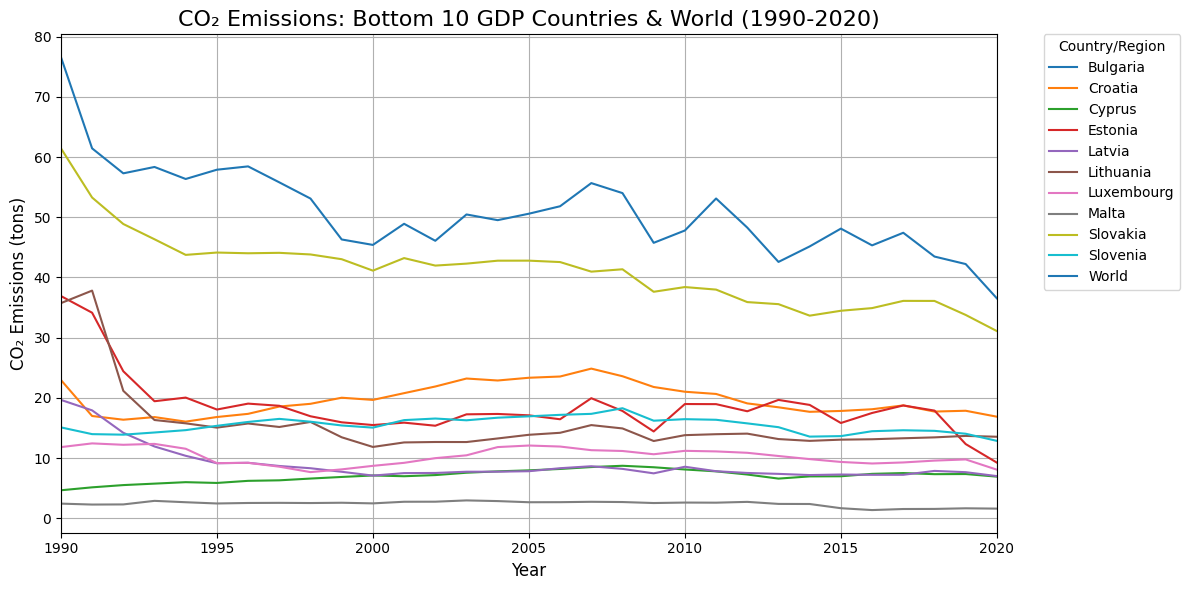

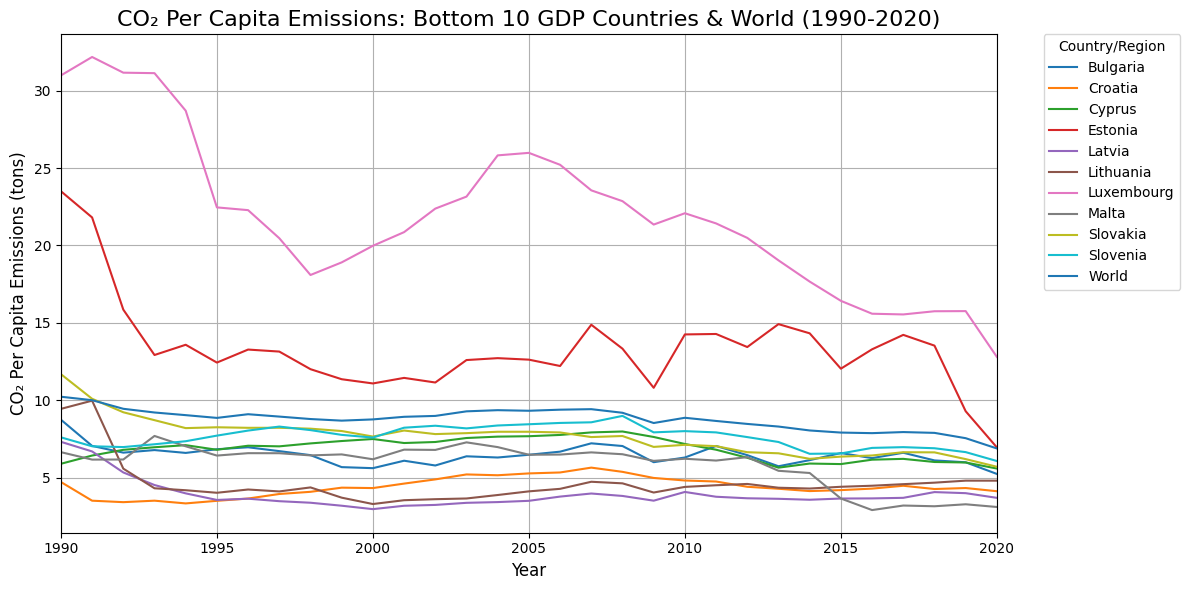

In [ ]:
# 3. CO2 emission per capita for the top 10 countries with the lowest GDP between 2015-2020

# Filter data for the years 2015-2020
data_2015_2020 = cleaned_df[(cleaned_df['year'] >= 2015) & (cleaned_df['year'] <= 2020)]

# Calculate the average GDP for each country between 2015 and 2020
avg_gdp = data_2015_2020.groupby('iso_code', as_index=False).agg({'gdp': 'mean'})

# Get the bottom 10 countries with the lowest average GDP
bottom_gdp_countries = avg_gdp.nsmallest(10, 'gdp')['iso_code'].tolist()

# Create a copy of the filtered data to avoid SettingWithCopyWarning
small_countries_data = cleaned_df[cleaned_df['iso_code'].isin(bottom_gdp_countries)].copy()

# Calculate the global average per capita CO2 emissions
global_avg = cleaned_df.groupby('year', as_index=False).agg({'co2_per_capita': 'mean'})
global_avg['iso_code'] = 'World'  # Add a label for the global average

# Combine big countries data with global average
combined_data = pd.concat([small_countries_data, global_avg], ignore_index=True)

# Mapping ISO codes to full country names (Update this as necessary if iso_code to country mapping is available)
data_latest_year = cleaned_df[cleaned_df['year'] == cleaned_df['year'].max()]
country_name_mapping = {row['iso_code']: row['country'] for _, row in data_latest_year.iterrows()}
country_name_mapping['World'] = 'World'  # Include "World" for global average

# Replace ISO codes with country names
combined_data['country_name'] = combined_data['iso_code'].map(country_name_mapping)

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_data, x='year', y='co2', hue='country_name', palette='tab10')
plt.title("CO₂ Emissions: Bottom 10 GDP Countries & World (1990-2020)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("CO₂ Emissions (tons)", fontsize=12)
plt.xlim(1990, 2020)
plt.legend(title="Country/Region", loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_data, x='year', y='co2_per_capita', hue='country_name', palette='tab10')
plt.title("CO₂ Per Capita Emissions: Bottom 10 GDP Countries & World (1990-2020)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("CO₂ Per Capita Emissions (tons)", fontsize=12)
plt.xlim(1990, 2020)
plt.legend(title="Country/Region", loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Mapping ISO codes to full country names (Update this as necessary if iso_code to country mapping is available)
data_latest_year = cleaned_df[cleaned_df['year'] == cleaned_df['year'].max()]
country_name_mapping = {row['iso_code']: row['country'] for _, row in data_latest_year.iterrows()}
country_name_mapping['World'] = 'World'  # Include "World" for global average

# Replace ISO codes with country names
cleaned_df['country_name'] = cleaned_df['iso_code'].map(country_name_mapping)

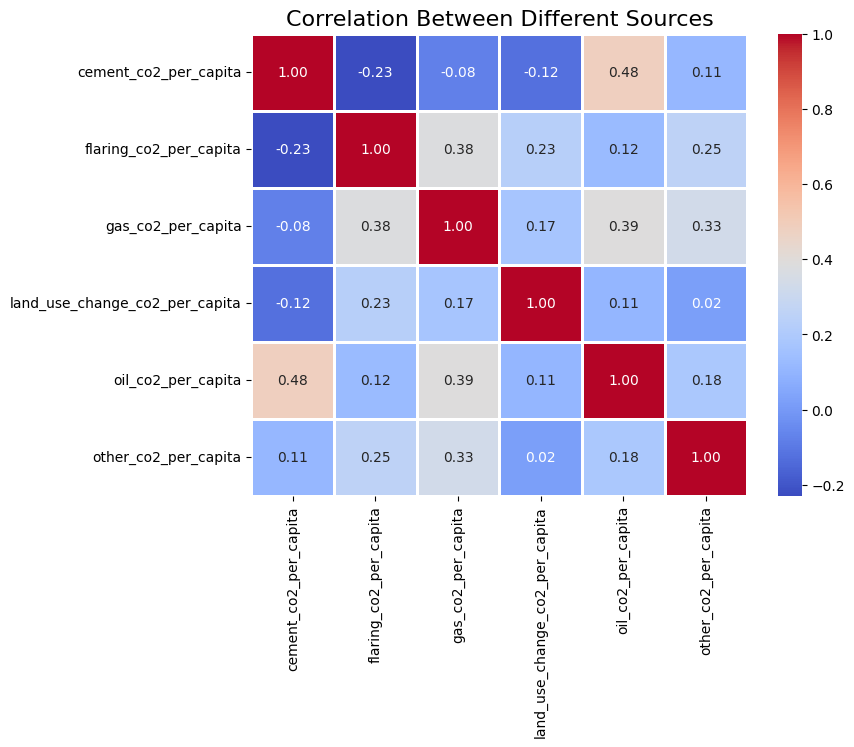

In [ ]:
# 5. Correlation between different sources

def plot_sources_correlation(df, sources):
    # Filter the data for the years 1990-2020
    df_filtered = df[(df['year'] >= 1990) & (df['year'] <= 2020)]

    # Select relevant columns for the sources and year
    df_sources = df_filtered[['year'] + sources]

    # Compute the correlation matrix
    correlation_matrix = df_sources[sources].corr()

    # Plot the heatmap of the correlation matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)
    plt.title('Correlation Between Different Sources', fontsize=16)
    plt.show()

# List of sources to analyze
sources = ['cement_co2_per_capita', 'flaring_co2_per_capita',
         'gas_co2_per_capita', 'land_use_change_co2_per_capita',
         'oil_co2_per_capita', 'other_co2_per_capita']

# Plot the correlation between different sources
plot_sources_correlation(cleaned_df, sources)

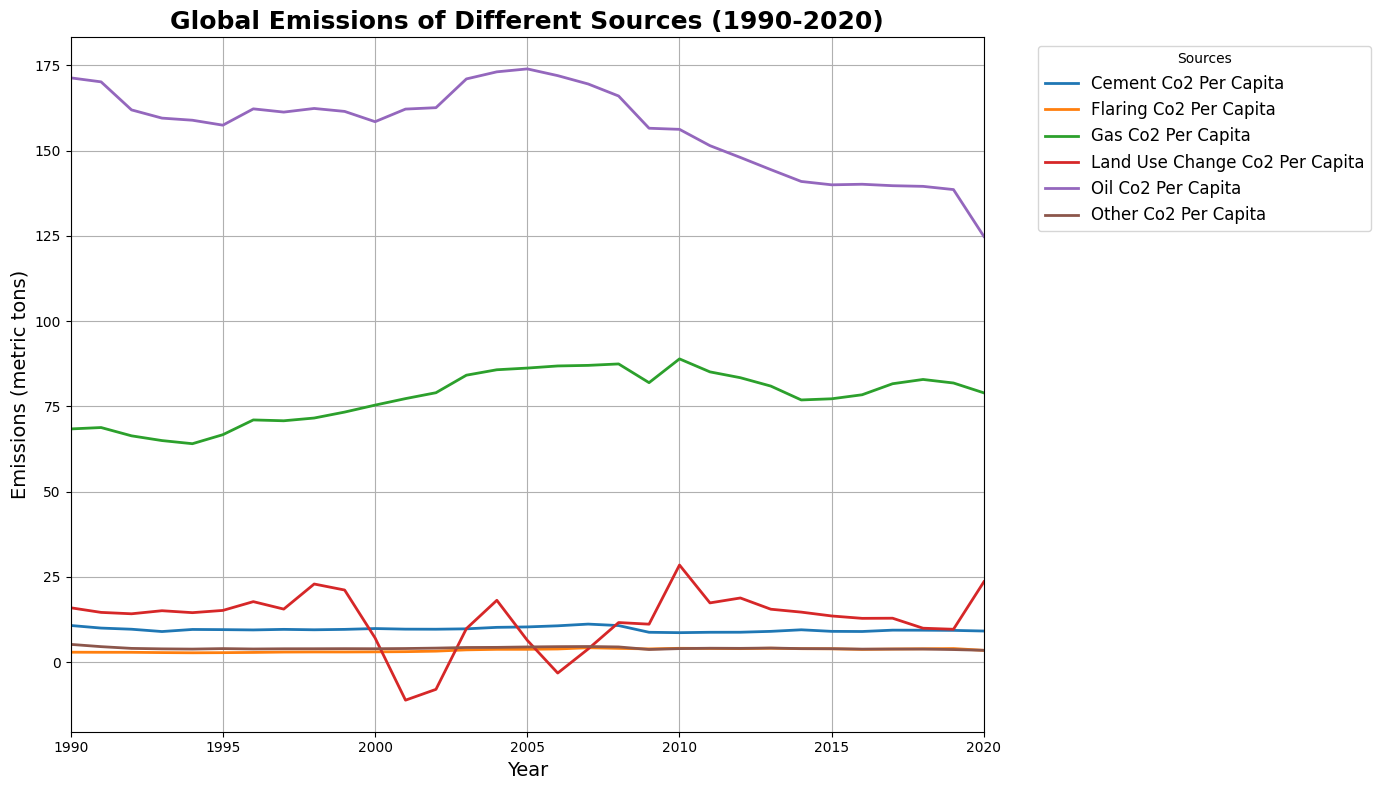

In [ ]:
# 7. Analyzing the global trend of each source over time

def global_trends(df, sources):
    df_filtered = df[(df['year'] >= 1990) & (df['year'] <= 2020)]  # Filter data for 1990-2020

    # Create a single plot
    plt.figure(figsize=(14, 8))

    for source in sources:
        global_trend = df_filtered.groupby('year').agg({source: 'sum'}).reset_index()
        sns.lineplot(data=global_trend, x='year', y=source, label=source.replace('_', ' ').title(), linewidth=2)

    plt.title('Global Emissions of Different Sources (1990-2020)', fontsize=18, fontweight='bold')
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Emissions (metric tons)', fontsize=14)
    plt.xlim(1990, 2020)
    plt.xticks(range(1990, 2021, 5))
    plt.legend(title='Sources', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# List of sources to analyze
sources = ['cement_co2_per_capita', 'flaring_co2_per_capita',
         'gas_co2_per_capita', 'land_use_change_co2_per_capita',
         'oil_co2_per_capita', 'other_co2_per_capita']

# Plot global trends for each gas
global_trends(cleaned_df, sources)

In [ ]:
# Specify the path to the downloaded shapefile
shapefile_path = 'https://raw.githubusercontent.com/riyachandaria/BSc-Data-Science-Project/main/Data%20Files/ne_110m_admin_0_countries.shp'

# Load the shapefile using geopandas
world = gpd.read_file(shapefile_path)
# Filter relevant columns (ISO country code and continent/region)
world = world[['ISO_A3', 'CONTINENT']]

# Merge the country iso_codes with the continent info from the world GeoDataFrame
df2 = cleaned_df.merge(world, left_on='iso_code', right_on='ISO_A3', how='left')

# Display the DataFrame with region information
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         1320 non-null   object 
 1   year                            1320 non-null   int64  
 2   iso_code                        1320 non-null   object 
 3   population                      1320 non-null   float64
 4   gdp                             1320 non-null   float64
 5   cement_co2                      1320 non-null   float64
 6   cement_co2_per_capita           1320 non-null   float64
 7   co2                             1320 non-null   float64
 8   co2_growth_abs                  1320 non-null   float64
 9   co2_growth_prct                 1320 non-null   float64
 10  co2_per_capita                  1320 non-null   float64
 11  co2_per_gdp                     1320 non-null   float64
 12  coal_co2                        13

In [ ]:
# Identifying missing ISO_A3 codes

# Find rows without an ISO_A3 code in df2
missing_iso_rows = df2[df2['ISO_A3'].isnull()]

# Get the unique values of the 'iso_code' column from these rows
unique_missing_iso_codes = missing_iso_rows['iso_code'].unique()

# Print the unique missing iso codes
unique_missing_iso_codes

array(['FRA', 'MLT', 'NOR'], dtype=object)

In [ ]:
# Manually add missing countries with their respective continents
missing_countries = {
    'FRA': 'Europe',  # France
    'NOR': 'Europe',  # Norway
    'MLT': 'Europe',  # Malta
}

# Create a DataFrame with these missing countries
missing_df = pd.DataFrame(list(missing_countries.items()), columns=['ISO_A3', 'CONTINENT'])

# Append the manually added countries to the world GeoDataFrame
world = pd.concat([world, missing_df], ignore_index=True)

# Merge the cleaned_df with the updated world GeoDataFrame
df2 = cleaned_df.merge(world[['ISO_A3', 'CONTINENT']], left_on='iso_code', right_on='ISO_A3', how='left')

# Display the DataFrame with region information
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         1320 non-null   object 
 1   year                            1320 non-null   int64  
 2   iso_code                        1320 non-null   object 
 3   population                      1320 non-null   float64
 4   gdp                             1320 non-null   float64
 5   cement_co2                      1320 non-null   float64
 6   cement_co2_per_capita           1320 non-null   float64
 7   co2                             1320 non-null   float64
 8   co2_growth_abs                  1320 non-null   float64
 9   co2_growth_prct                 1320 non-null   float64
 10  co2_per_capita                  1320 non-null   float64
 11  co2_per_gdp                     1320 non-null   float64
 12  coal_co2                        13

In [ ]:
# Checking continents
print(df2['CONTINENT'].unique())

['Oceania' 'Europe' 'South America' 'North America' 'Asia']


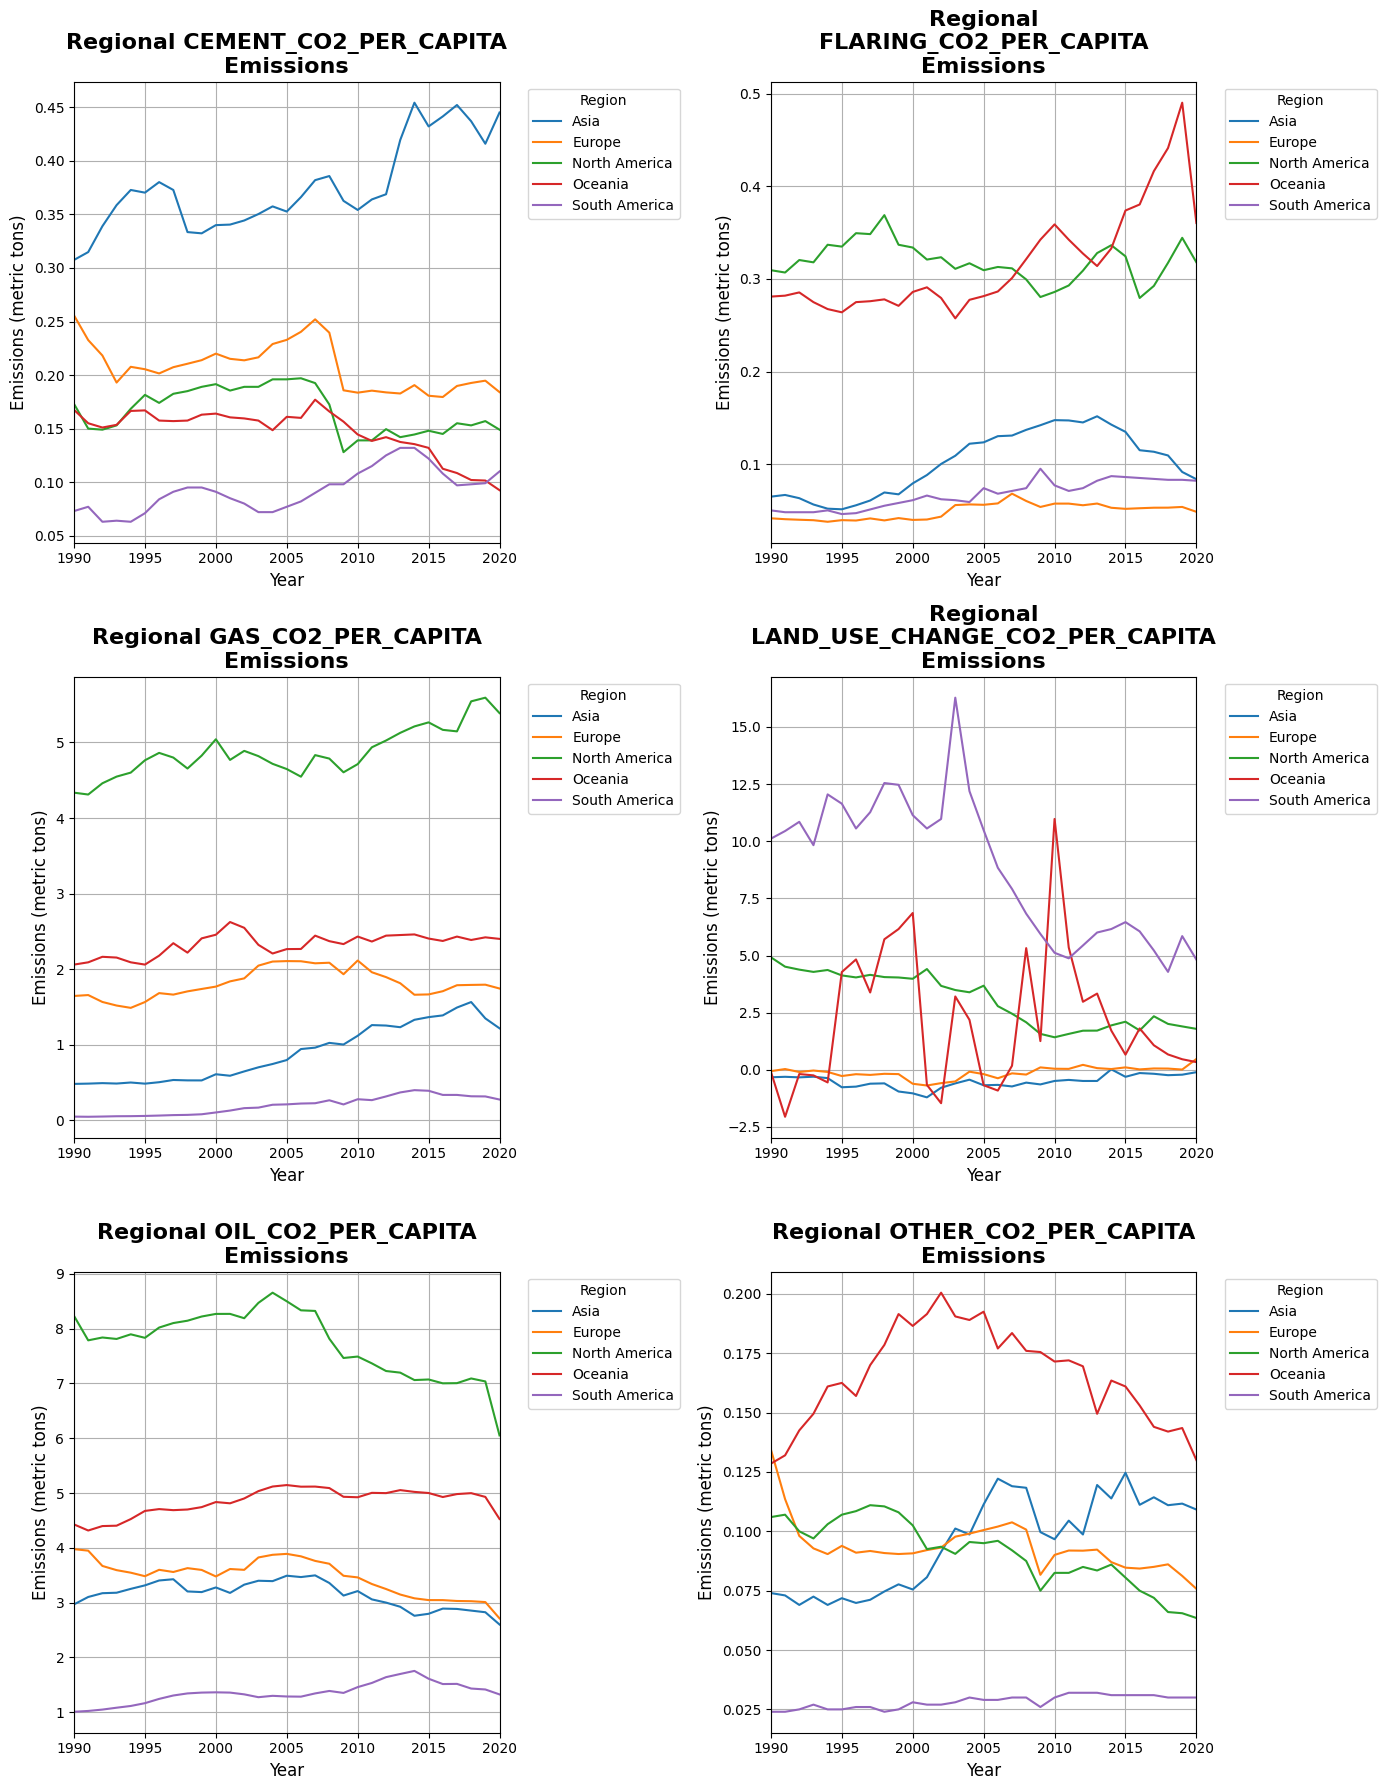

In [ ]:
# 8. Regional Contributions

def regional_emissions_analysis(df, sources):
    """
    Analyze different sources emissions by region.

    Parameters:
    - df: DataFrame containing emissions data.
    - sources: List of different sources to analyze.
    """
    # Count the number of unique countries (ISO_A3) in each continent
    country_count_by_continent = df.groupby('CONTINENT')['ISO_A3'].nunique().reset_index()
    country_count_by_continent.rename(columns={'ISO_A3': 'num_countries'}, inplace=True)

    # Merge this count back to the original dataframe
    df = df.merge(country_count_by_continent, on='CONTINENT', how='left')

    # Group by continent and year, then sum the emissions, and divide by the number of countries
    regional_data = df.groupby(['CONTINENT', 'year'])[sources].sum().reset_index()
    regional_data['num_countries'] = df.groupby(['CONTINENT', 'year'])['num_countries'].first().values

    # Normalize emissions by dividing by the number of countries in each continent
    for source in sources:
        regional_data[source] = regional_data[source] / regional_data['num_countries']

    # Plotting setup
    df_filtered = regional_data[(regional_data['year'] >= 1990) & (regional_data['year'] <= 2020)]  # Filter data for 1990-2020
    num_sources = len(sources)
    num_cols = 2  # Adjust based on preference
    num_rows = math.ceil(num_sources / num_cols)

    # Creat subplots for each source
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 6 * num_rows))
    axes = axes.flatten()

    for i, source in enumerate(sources):
        sns.lineplot(
            data=regional_data,
            x='year',
            y=source,
            hue='CONTINENT',
            ax=axes[i],
            palette='tab10'
        )
        axes[i].set_title(textwrap.fill((f'Regional {source.upper()} Emissions'), width=30), fontsize=16, fontweight='bold')
        axes[i].set_xlabel('Year', fontsize=12)
        axes[i].set_ylabel('Emissions (metric tons)', fontsize=12)
        axes[i].legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
        axes[i].set_xlim(1990, 2020)
        axes[i].set_xticks(range(1990, 2021, 5))
        axes[i].grid(True)

    # Remove unused subplots if any
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

regional_emissions_analysis(df2, sources)

In [ ]:
# Creating a column for total_ghg per capita
df2['total_ghg_per_capita'] = df2['total_ghg'] / df2['population']

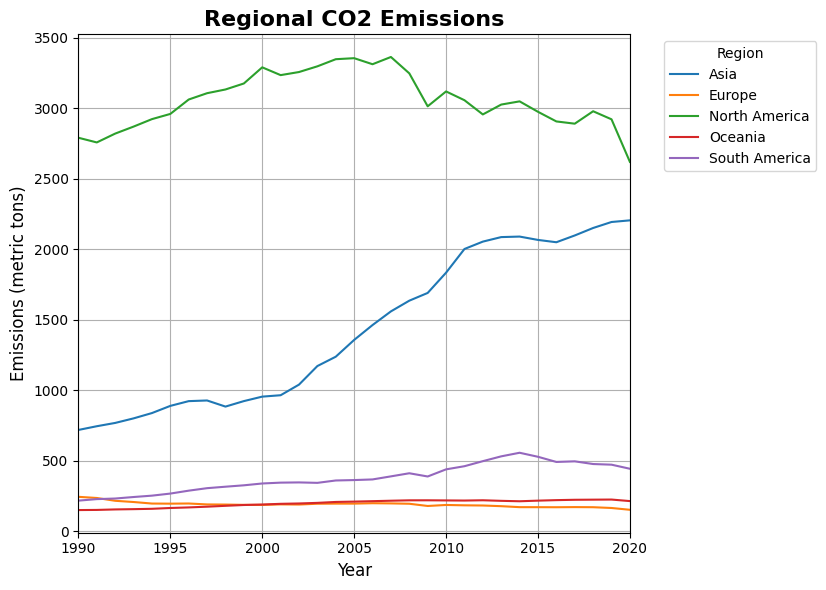

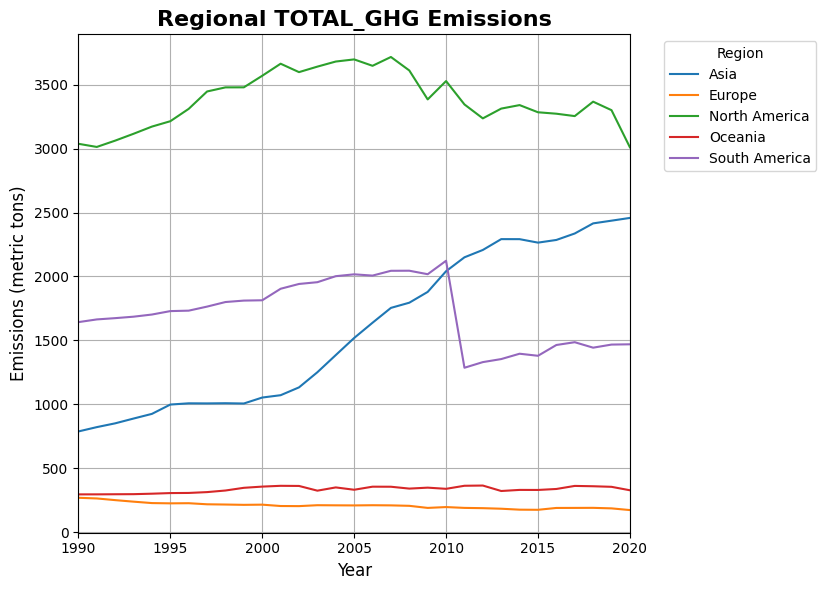

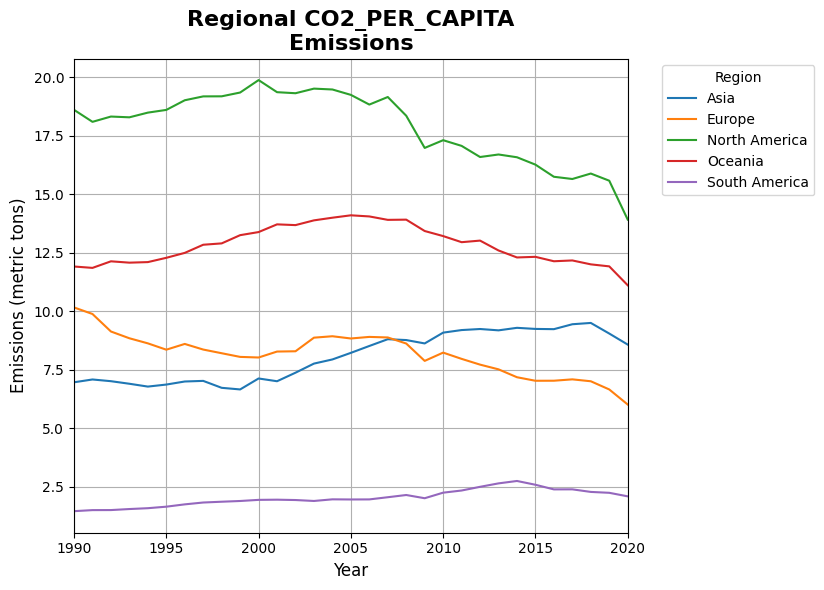

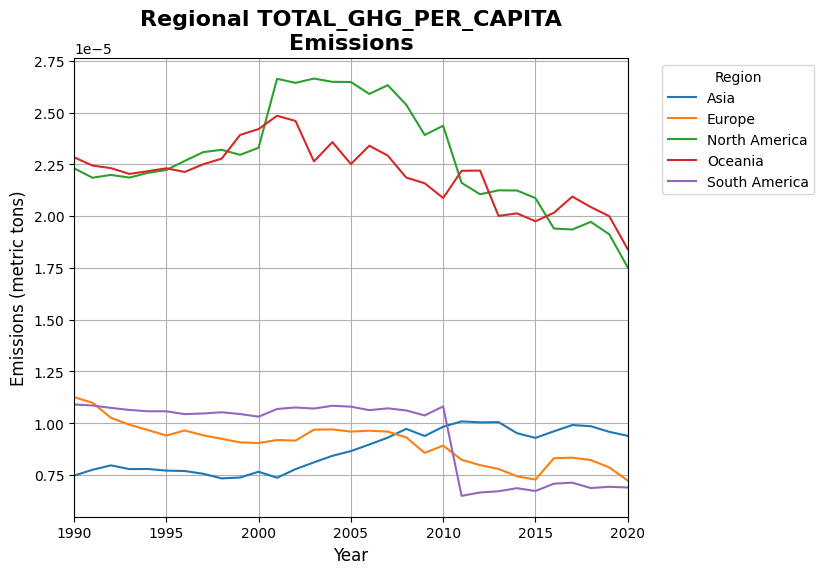

In [ ]:
regional_emissions_analysis(df2, ['co2'])
regional_emissions_analysis(df2, ['total_ghg'])
regional_emissions_analysis(df2, ['co2_per_capita'])
regional_emissions_analysis(df2, ['total_ghg_per_capita'])

In [ ]:
# 9. Descriptive Statistics per Country

country_stats = df2.groupby('country_name')['co2_per_capita'].describe().reset_index()

print("\033[1mCO2 per Capita Statistics by Country:\033[0m")
display(country_stats)

CO2 per Capita Statistics by Country:


,country_name,count,mean,std,min,25%,50%,75%,max
0,Australia,31.0,17.607839,1.114164,15.453,16.6875,17.4000,18.60150,19.216
1,Austria,31.0,8.282774,0.655564,6.974,7.6955,8.2180,8.67000,9.614
2,Belarus,31.0,6.459484,1.207581,5.294,5.8705,6.1300,6.43600,10.389
3,Belgium,31.0,10.977097,1.614346,7.880,9.2670,11.9450,12.28300,12.790
4,Brazil,31.0,2.020871,0.348102,1.451,1.8380,1.9540,2.25800,2.742
5,Bulgaria,31.0,6.463258,0.637978,5.235,6.0990,6.4500,6.74300,8.741
6,Canada,31.0,16.769258,1.092189,13.800,16.1330,16.5290,17.71600,18.482
7,China,31.0,4.756129,2.049082,2.154,2.8370,4.5080,7.05200,7.659
8,Croatia,31.0,4.411258,0.632146,3.330,4.0990,4.3240,4.84650,5.643
9,Cyprus,31.0,6.851097,0.724725,5.584,6.1825,7.0180,7.42700,7.978


In [ ]:
# 10. Displaying on a map

import geopandas as gpd
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

# Assuming df2 is the dataframe containing the required emissions data
# Sum the total emissions per region/country, replace with 'co2_per_capita' if needed
region_emissions = df2.groupby('country_name')['co2_per_capita'].sum().reset_index().round(2)
region_emissions.columns = ['Country Name', 'sum']

# Load the '110m' cultural vectors dataset from a local file path
world = gpd.read_file('https://raw.githubusercontent.com/riyachandaria/BSc-Data-Science-Project/main/Data%20Files/ne_110m_admin_0_countries.shp')

# Ensure CRS is set
if world.crs is None:
    world.set_crs(epsg=4326, inplace=True)  # Set CRS to WGS 84 if not defined

# Merge the world map with the sum of CO2 emissions based on country names
world = world.merge(region_emissions, left_on='ADMIN', right_on='Country Name', how='left')

# Filter out rows with count 0 emissions
world = world[world['sum'] > 0]

# Create a Folium Map centered at the mean of latitude and longitude
m = folium.Map(location=[world.geometry.centroid.y.mean(), world.geometry.centroid.x.mean()], zoom_start=2)

# Add GeoJSON data to the map, with tooltips showing the country and the sum of CO2 emissions
folium.GeoJson(
    world,
    name='geojson',
    tooltip=folium.features.GeoJsonTooltip(fields=['ADMIN', 'sum'], aliases=['Country', 'Emissions'])
).add_to(m)

# Add sum values as text annotations using MarkerCluster
marker_cluster = MarkerCluster().add_to(m)
for idx, row in world.iterrows():
    folium.Marker(
        location=[row.geometry.centroid.y, row.geometry.centroid.x],
        popup=f"{row['ADMIN']}: {row['sum']:.0f}",
    ).add_to(marker_cluster)

# Display the map
display(m)

<ipython-input-28-27468d640a1b>:28: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  m = folium.Map(location=[world.geometry.centroid.y.mean(), world.geometry.centroid.x.mean()], zoom_start=2)
